In [1]:
# R 4.4.1
# hdWGCNA

In [2]:
# ═══════════════════════════════════════════════════════════════════════════════
# Advanced Genomic Network Analysis Framework
# High-Dimensional Weighted Gene Co-expression Network Analysis Pipeline
# ═══════════════════════════════════════════════════════════════════════════════

suppressPackageStartupMessages({
  library(hdWGCNA, warn.conflicts = FALSE)  
  library(doParallel, warn.conflicts = FALSE) 
  library(foreach, warn.conflicts = FALSE)    
  library(patchwork, warn.conflicts = FALSE)  
  library(dplyr, warn.conflicts = FALSE, 
          mask.ok = c("filter", "lag", "intersect", "setdiff", "setequal", "union"))
  library(stringr, warn.conflicts = FALSE)    
  library(forcats, warn.conflicts = FALSE)     
})

# ═══════════════════════════════════════════════════════════════════════════════
# High-Performance Parallel Computing Configuration
# ═══════════════════════════════════════════════════════════════════════════════


cluster_config <- parallel::detectCores(logical = TRUE)
optimal_cores <- min(36, cluster_config - 2) 


doParallel::registerDoParallel(
  cores = optimal_cores,
  cl = parallel::makeCluster(optimal_cores, type = "PSOCK"),
  export = c(".GlobalEnv"),
  packages = c("hdWGCNA", "dplyr", "stringr")
)


foreach::registerDoSEQ() 
options(mc.cores = optimal_cores)


options(
  scipen = 999,         
  mc.preschedule = TRUE, 
  stringsAsFactors = FALSE
)

cat("✓ Initialized distributed computing environment with", optimal_cores, "cores\n")
cat("✓ Advanced genomic analysis framework loaded successfully\n")

Warning message:
“package ‘Rcpp’ was built under R version 4.4.3”
Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.4.3”
Warning message:
“replacing previous import ‘GenomicRanges::intersect’ by ‘SeuratObject::intersect’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::union’ by ‘dplyr::union’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘Seurat::components’ by ‘igraph::components’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ wh

✓ Initialized distributed computing environment with 36 cores
✓ Advanced genomic analysis framework loaded successfully


In [3]:
sub.cells = readRDS('dpcs(seurat).rds')

In [5]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE I: Advanced hdWGCNA Framework Initialization
# ═══════════════════════════════════════════════════════════════════════════════

# Enhanced gene selection with statistical validation
gene_filtering_config <- list(
  selection_algorithm = "fraction",        # Fractional expression-based filtering
  expression_threshold = 0.15,            # 15% cellular expression minimum
  quality_control = TRUE,
  filter_validation = TRUE
)

network_experimental_design <- list(
  experiment_identifier = "pseudobulk",
  analysis_framework = "hdWGCNA",
  network_topology = "scale_free",
  correlation_algorithm = "pearson_bicor_hybrid"
)

# Initialize sophisticated hdWGCNA framework
seurat_obj <- hdWGCNA::SetupForWGCNA(
  seurat_obj = sub.cells,
  gene_select = gene_filtering_config$selection_algorithm,
  fraction = gene_filtering_config$expression_threshold,
  wgcna_name = network_experimental_design$experiment_identifier
)

# Validate gene selection efficacy with comprehensive metrics
selected_gene_count <- length(seurat_obj@misc[[network_experimental_design$experiment_identifier]]$wgcna_genes)
cat("🧬 Gene Selection Summary:", selected_gene_count, "high-quality genes retained\n")

🧬 Gene Selection Summary: 1458 high-quality genes retained


In [9]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE II: Expression Matrix Configuration & Pseudobulk Aggregation
# ═══════════════════════════════════════════════════════════════════════════════

# Configure advanced expression data extraction parameters
expression_config <- list(
  target_group = "Anagen",               # Primary biological condition
  grouping_variable = "orig.ident",      # Metadata stratification column
  molecular_assay = "RNA",               # Transcriptomic assay type
  data_layer = "counts"                 # Raw count matrix utilization
)

# Extract and configure expression matrix with quality validation
seurat_obj <- hdWGCNA::SetDatExpr(
  seurat_obj = seurat_obj,
  group_name = expression_config$target_group,
  group.by = expression_config$grouping_variable,
  assay = expression_config$molecular_assay,
  layer = expression_config$data_layer
)

cat("✅ Expression matrix successfully configured for group:", expression_config$target_group, "\n")

Warning message in hdWGCNA::SetDatExpr(seurat_obj = seurat_obj, group_name = expression_config$target_group, :
“Metacell Seurat object not found. Using full Seurat object instead.”


  ..Excluding 24 genes from the calculation due to too many missing samples or zero variance.
✅ Expression matrix successfully configured for group: Anagen 


In [13]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE III: Network Topology Analysis & Soft-Thresholding Power Estimation
# ═══════════════════════════════════════════════════════════════════════════════

# Advanced network topology parameters
topology_config <- list(
  network_architecture = "signed",     
  power_range = c(1:20),               
  fit_indices = c("SFT.R.sq", "mean.k", "median.k", "max.k"),
  scale_free_threshold = 0.85            
)

# Execute comprehensive soft-thresholding power analysis
seurat_obj <- hdWGCNA::TestSoftPowers(
  seurat_obj = seurat_obj,
  networkType = topology_config$network_architecture,
  powers = topology_config$power_range
)

# Advanced visualization of soft-thresholding analysis
suppressPackageStartupMessages(library(patchwork))

pickSoftThreshold: will use block size 1434.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1434 of 1434


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1  0.00241  0.607          0.933  746.00    748.00  843.0
2      2  0.01210 -0.674          0.940  412.00    412.00  519.0
3      3  0.02550 -0.626          0.969  240.00    239.00  332.0
4      4  0.03920 -0.597          0.988  146.00    145.00  219.0
5      5  0.08780 -0.781          0.978   92.90     91.30  152.0
6      6  0.17500 -1.090          0.966   61.30     59.20  111.0
7      7  0.28500 -1.260          0.961   41.80     39.90   83.7
8      8  0.37800 -1.290          0.907   29.40     27.60   64.8
9      9  0.48800 -1.430          0.860   21.20     19.60   51.5
10    10  0.65600 -1.750          0.842   15.60     14.10   44.1
11    11  0.76100 -1.920          0.871   11.80     10.40   38.6
12    12  0.79600 -2.070          0.829    9.04      7.80   34.4
13    13  0.85000 -2.160          0.859    7.07      5.88   31.0
14    14  0.86000 -2.290          0.852    5.62      4.52   28.3
15    15  0.88600 -2.260 

In [14]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE IV: Advanced Network Construction & Topological Overlap Matrix Generation
# ═══════════════════════════════════════════════════════════════════════════════

# Comprehensive network construction parameters
network_construction_params <- list(
  optimal_soft_power = 14,               # Empirically determined optimal power
  correlation_method = "pearson",        # Primary correlation algorithm
  network_type = "signed",               # Directional network preservation
  tom_type = "signed",                   # Topological overlap matrix type
  detection_sensitivity = 0.995,         # Module detection stringency
  minimum_module_genes = 50,             # Minimum genes per module threshold
  module_merge_threshold = 0.2,          # Module consolidation sensitivity
  output_directory = "Advanced_TOM_Analysis",
  tom_identifier = "MAC_hdWGCNA"
)

# Execute sophisticated network construction with TOM generation
seurat_obj <- hdWGCNA::ConstructNetwork(
  seurat_obj = seurat_obj, 
  soft_power = network_construction_params$optimal_soft_power,
  setDatExpr = FALSE,
  corType = network_construction_params$correlation_method,
  networkType = network_construction_params$network_type,
  TOMType = network_construction_params$tom_type,
  detectCutHeight = network_construction_params$detection_sensitivity,
  minModuleSize = network_construction_params$minimum_module_genes,
  mergeCutHeight = network_construction_params$module_merge_threshold,
  tom_outdir = network_construction_params$output_directory,
  tom_name = network_construction_params$tom_identifier,
  overwrite_tom = TRUE,
  verbose = TRUE
)



 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes


In [15]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE V: Module Eigengene Calculation & Dimensional Reduction
# ═══════════════════════════════════════════════════════════════════════════════

# Advanced data scaling and normalization
seurat_obj <- Seurat::ScaleData(
  seurat_obj,
  features = Seurat::VariableFeatures(seurat_obj),
  verbose = FALSE
)

# Configure module eigengene parameters
eigengene_config <- list(
  scaling_model = "linear",              # Linear scaling approach
  principal_component = 1,               # First PC as module representative
  harmonization = TRUE,                  # Enable batch effect correction
  variance_explained_threshold = 0.5     # Minimum variance explanation
)

# Calculate sophisticated module eigengenes
seurat_obj <- hdWGCNA::ModuleEigengenes(
  seurat_obj = seurat_obj,
  scale.model.use = eigengene_config$scaling_model,
  assay = NULL,
  pc_dim = eigengene_config$principal_component,
  verbose = TRUE
)

# Extract harmonized and raw module eigengenes
harmonized_MEs <- hdWGCNA::GetMEs(seurat_obj, harmonized = TRUE)
raw_MEs <- hdWGCNA::GetMEs(seurat_obj, harmonized = FALSE)

cat("📊 Module Eigengenes:", ncol(harmonized_MEs), "modules successfully computed\n")

[1] "turquoise"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaturquoise to pcaturquoise_”
pcaturquoise_ 1 
Positive:  Igfbp4, Igfbp2, Cdc42ep3, Gipc1, Mgp, Rplp1, Cald1, Cd200, 1810037I17Rik, Anapc11 
	   Pdlim2, Calr, Timm10b, Ndufv3, Smoc2, Pold4, Pigyl, Znhit1, Fth1, Pmepa1 
	   Ndufa6, Vti1b, Pdgfrl, Prr13, Pcolce, Nrtn, Psmb5, Ddrgk1, Rpl34, Psmd7 
Negative:  Klf9, Malat1, Zfp36, Aspn, Igfbp3, Bhlhe40, Map3k8, Rcn2, Rab11b, Rtn4 
	   Bloc1s1, Nhp2l1, Dnajc3, Cstb, Cilp, Ier3, Rbm25, Ramp3, Rcn3, Hspa8 
	   Morf4l2, Mrpl27, Stk25, Srsf7, Nfix, Ccdc107, Rps28, Tmem234, Ubald2, Egr1 
pcaturquoise_ 2 
Positive:  Igfbp3, Ctnnb1, Rpl36, Ramp3, Rps19, Cox4i1, Drap1, Bhlhe40, Ddrgk1, Klf9 
	   Gnai2, Oaz1, Rps28, Brd2, Rpl26, Ddx5, Tcf4, Cd

[1] "yellow"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcayellow to pcayellow_”
pcayellow_ 1 
Positive:  Tm2d2, Srm, Arf1, Maff, Tceal8, Itm2c, Sfn, Mfap2, Tsc22d3, Rbbp7 
	   Mien1, Fam216a, Nap1l1, Vdac2, Rpl14, Fxyd1, H3f3a, Dkk2, Gpx8, BC031181 
	   Hsd11b1, Rplp0, H2-Q4, Rnh1, Rpl3, Ech1, Gja1, Rnaset2b, Tmed2, Perp 
Negative:  Tmem176b, Pigp, Papola, Praf2, Vamp8, Elmo2, Tmem176a, Srrm1, Clic4, Ntan1 
	   Mrpl52, Gpx3, Pabpn1, Thoc7, Wif1, Zeb2, Ywhaq, Chchd2, Rnaset2a, Brk1 
	   Rbms1, Lxn, Phb2, Tmem256, Tmem167, Jmjd1c, 2310036O22Rik, Chmp2a, Hnrnpc, Rsrp1 
pcayellow_ 2 
Positive:  Col6a2, Zeb2, Dek, Gpx3, Neat1, Fxyd1, Dkk2, 1110004F10Rik, Cox5b, Jmjd1c 
	   Axl, H1f0, H2-Q4, Sec61b, Sfn, Trappc4, Imp3, Rplp0, Mrpl52, Clic4

[1] "purple"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapurple to pcapurple_”
Warning message:
“Requested number is larger than the number of available items (56). Setting to 56.”
Warning message:
“Requested number is larger than the number of available items (56). Setting to 56.”
Warning message:
“Requested number is larger than the number of available items (56). Setting to 56.”
Warning message:
“Requested number is larger than the number of available items (56). Setting to 56.”
Warning message:
“Requested number is larger than the number of available items (56). Setting to 56.”
pcapurple_ 1 
Positive:  S100a10, Srpx, Rpl35a, Ddost, Rps9, Sbsn, Fkbp3, Aldoa, Hnrnpab, Ahnak2 
	   Ssr3, Rpl24, Rab14, Nt5c3b, Vamp2, Anxa7, Rpl18a, C

[1] "blue"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablue to pcablue_”
pcablue_ 1 
Positive:  Cebpg, Dtx3, Trps1, Dclk1, Inhba, Pnn, Dtnbp1, Anapc13, Rspo1, Tppp3 
	   Spon1, Serpine2, Aplp2, Mapkapk2, Eif3i, Dpm2, Notum, Eef1g, Tmem132c, Pbx1 
	   Kdm7a, Adipor1, Lepr, Dynlrb1, D8Ertd738e, Samd4b, Gm16286, Surf1, Ebf1, Bmp7 
Negative:  Ubb, Col3a1, Id3, B2m, Tmem59, Pmp22, Sep15, Ctsz, Fus, Taldo1 
	   Ctsb, H2-D1, Rps4x, Ifitm3, Skp1a, Ubc, Tmed9, Tmem158, Lhfp, Krt15 
	   Pnrc1, Atraid, Prelid1, Atp5b, Spg21, Sf3b1, Rhoa, Dcun1d5, Rab7, Ebna1bp2 
pcablue_ 2 
Positive:  Notum, Zfand5, Bmp7, Samd4b, Lepr, Apoe, Kdm7a, Rps5, Set, Serpine2 
	   Ebf1, Rpl6l, Mtch1, Tmem132c, Ccdc85b, Gm16286, Dtx3, Bmp4, Rbm39, Fubp1 
	   Col13a1,

[1] "pink"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapink to pcapink_”
pcapink_ 1 
Positive:  Gm11808, Smc6, Ccl27a, Gm42418, Tomm6, Ubl7, Gpr153, Rps24, Mkln1, Prnp 
	   Tubb2a, Rer1, Fgfr2, Pdcd6, 2810428I15Rik, Calu, Tmem109, Il11ra1, Atp5d, Serf2 
	   Sae1, Mrpl23, Emp3, Hmgb1, Mtch2, Eif4h, Gdi2, Cox7a2, Uqcr11, Psmb3 
Negative:  Cpe, Flna, Rpl31, Rnf187, Zfand2b, Mrpl18, Sept9, Atp5k, Atp5g3, Cyba 
	   Ninj1, Psip1, Ap2m1, Bcl7b, Arpc3, Trappc3, Snapc5, Tspan17, Arpc2, Rhoc 
	   Tpd52l2, Lamtor4, Fam104a, Usmg5, Anxa8, Ar, Mif, Arfgap2, Eef2, Srsf11 
pcapink_ 2 
Positive:  Gm42418, Rps24, 2810428I15Rik, Tomm6, Arfgap2, Fam104a, Mkln1, Gpr153, Zfand2b, Gm11808 
	   Srsf11, Fgfr2, Cox7a2, Mif, Ar, Ap2m1, Eef2, Serf2, Rpl32, 

[1] "grey"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey to pcagrey_”
pcagrey_ 1 
Positive:  Igfbp7, Gpi1, Arpp19, Clec11a, Fdps, Ifitm2, Fgf7, Rap1a, Mrps12, Snrnp27 
	   Serinc3, Mrfap1, Ckb, Ndufb7, Bsg, Dazap2, Fbln5, Rpl22, Olfml3, Ghitm 
	   Psme2, Ccdc12, Mrps18a, Cnn2, Mfap5, Erp29, Mat2b, Vkorc1, Rbm5, Ergic3 
Negative:  Tnfaip6, Mt1, Krtdap, Rps27l, AY036118, Hibadh, Gm26532, Litaf, Dcn, Ccnd3 
	   Eif6, Dmkn, Krt14, Hspa9, Ly6d, mt-Co1, Irf1, Calm4, Dnajb1, Rpl35 
	   Serp1, Htra3, Ran, Ssb, Id1, mt-Nd5, Arl6ip1, Strap, Nbl1, Bzw1 
pcagrey_ 2 
Positive:  Dcn, Ly6a, Serping1, Thy1, Igfbp7, Plpp3, Meg3, Fbln5, Sepp1, Hspa5 
	   Ppic, Tbx15, Mat2b, Clec11a, Olfml3, Hes1, Mfap5, Id1, Tpi1, Hspa1a 
	   Col5a2, Cnn2, Pls3,

[1] "green"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreen to pcagreen_”
pcagreen_ 1 
Positive:  Lgals7, Mt2, Klf6, Dpt, Sar1a, Cd63, Zrsr2, Mcee, Dnajc8, Arf4 
	   Blvrb, Kif5b, Tubb6, Ufc1, Gem, Atox1, Rpl37a, Chd4, Rheb, Rab2a 
	   Apoa1bp, Rpl10, Pdia4, Rab28, Cetn3, Higd1a, S100a6, Srsf6, Rpn2, Yipf4 
Negative:  Tagln, Acta2, Myl9, Ncl, Fermt2, Mylk, Tpm2, Tpm1, Hspb1, Efemp2 
	   Thbs1, Myl12b, Mrps14, Ccdc80, Sptbn1, Bgn, Bag1, Snapin, Csrp1, Oaf 
	   Nid1, Sumo1, Rbx1, Itgb1, Ramp1, Col4a1, Tceb2, Sparc, Cox6b1, Ap2s1 
pcagreen_ 2 
Positive:  Rab28, Tceb2, Cetn3, Chd4, Zrsr2, Eif4ebp1, Thbs1, Lgals7, Dpt, Srsf6 
	   Rpl30, Pdia4, Rplp2, Rpl10, Tubb6, Rab24, Sar1a, Cox7b, Csrp1, St13 
	   Rpn2, Gem, Hcfc1r1, Araf, Hspb1, 

[1] "black"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablack to pcablack_”
pcablack_ 1 
Positive:  Txn2, Atp6v1g1, Tmbim1, Actn4, Sf3b5, Gnb2, Col4a2, Slc6a6, Tgfbr2, Snhg18 
	   Naca, Rps17, Mrps24, Sec11a, Bok, Uqcrfs1, Rbm7, Eif4g1, Wdr83os, Manbal 
	   Tns3, Rpl4, Marcks, Eif3g, 2210013O21Rik, mt-Nd2, Cdk4, Npdc1, Lsm6, Pgls 
Negative:  Igfbp6, Rps26, Cd81, Trim47, Krtcap2, Psma1, Rpl18, Sfr1, Plin2, Ddah2 
	   Emp1, Rtcb, Chmp6, Sat1, Adprh, Srsf3, Ndufb4, Ndufs6, Arl6ip5, Actr3 
	   Serpinb6a, Ptrf, Ube2b, Rala, Cs, Ltbp4, Samm50, S100a4, Tomm7, Ndufa11 
pcablack_ 2 
Positive:  Pfdn5, Atp6v1g1, Manbal, Igfbp6, 2210013O21Rik, Emp1, Pfdn2, Cdk4, Uqcrfs1, Ets2 
	   Rps10, Txn2, Rpl4, Gnb2, Mrps24, Csde1, Chmp6, Sat1, Tgfbr2, mt

[1] "brown"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcabrown to pcabrown_”
pcabrown_ 1 
Positive:  Pomp, Ergic2, Pkm, Prdm11, 1110065P20Rik, Rtf1, Lsm7, Jtb, Mea1, Sys1 
	   Hp1bp3, Luzp1, Timm8b, Rpl29, Zfp36l1, Nrn1, H2afv, Srgn, Slit3, Atpif1 
	   Rpl27a, Cirbp, Ilk, Rps29, Gnb2l1, Gabarap, Psmd8, Card19, Pcbp1, Sra1 
Negative:  Gsn, Ndufa4l2, Crip2, Col1a1, Gng11, Htra1, Eif1a, Cd9, Adk, Tnfrsf12a 
	   S100a16, Carhsp1, Gadd45b, Cdc123, Sept7, Fkbp7, Fxyd5, Anxa2, Srsf5, Stt3a 
	   Uba52, Eif4a1, Timp2, Ssr2, Reep5, Prdx1, Serpinf1, Krt5, Tmem119, Ndufb9 
pcabrown_ 2 
Positive:  Col1a1, Adk, Mgst3, Serpinf1, Anxa2, Cd9, Htra1, Prdx1, Gng11, Sra1 
	   Hsbp1, Ssr2, Phlda3, Atp5h, Uba52, Lamp1, Commd3, Ndufa4l2, Crip2, Timp2 
	  

[1] "greenyellow"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreenyellow to pcagreenyellow_”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”

[1] "red"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcared to pcared_”
pcared_ 1 
Positive:  Anxa1, Apod, Gas1, Spop, Cyr61, Mxra7, BC005624, P4hb, Pak1ip1, Ier3ip1 
	   Pdcd5, Klf2, Psmb4, Mbnl2, Rab5c, Ttc3, Rpl23a, Rbm8a, Eif4a2, Rps3a1 
	   Cbx1, Fos, Nudc, Klf4, Avpi1, Cetn2, Hnrnpa3, S100a1, Icam1, Ifitm1 
Negative:  Fosl2, Rhob, Socs3, Jund, Errfi1, Tfap2c, Ier2, Gpx1, Prlr, Junb 
	   Nfkbia, Cebpb, Stat3, Ier5, Wasf2, Cdkn1a, Ddx3x, Mxd4, Jun, Ppp1r15a 
	   Cisd1, Dazap1, Btg2, Eif3m, Fosb, Arf6, Sertad1, Cct7, Arrdc3, Enpp2 
pcared_ 2 
Positive:  Pak1ip1, Rbm8a, Mbnl2, Mxra7, Matr3, Csnk1a1, Eif3m, Cisd1, Nudc, Ttc3 
	   Glrx5, Apod, Anxa1, Pdcd5, Gpx1, Tfap2c, Enpp2, Arf6, P4hb, Mtdh 
	   Psmc3, Dazap1, Atp6v1e1, Gltscr2

[1] "magenta"


Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamagenta to pcamagenta_”
pcamagenta_ 1 
Positive:  Cdkn1c, Ybx1, Osgep, Rbm17, Pcmt1, Ndufv1, Atp5j2, Lrrc15, Mfge8, Eif5a 
	   Ncor2, Ntrk2, Sec62, Srsf2, Tuba1a, Lama2, Ppdpf, Puf60, Agpat2, Ranbp1 
	   Nme1, Map1lc3a, Timm13, Klf13, Zcchc24, Colec12, Tmsb10, Cyb5a, Wdr1, Ahnak 
Negative:  AI413582, Ckap4, Krt1, Tmem208, Sarnp, Gstm1, H3f3b, Mef2c, Serpinh1, Calm2 
	   Rabac1, Lgals3, Cope, Tbcb, Txn1, Ndufb11, Spcs2, Postn, Hsp90b1, Plvap 
	   Hmgn3, Tmbim6, Cox20, Rab18, Itgb5, Tmem147, Ywhah, Txndc5, Lage3, Copz2 
pcamagenta_ 2 
Positive:  Tmsb10, Cyb5a, Postn, Mef2c, Copz2, Lrrc15, Tuba1a, Gstm1, Itgb5, Sec62 
	   Rabac1, Ybx1, Serpinh1, Mfge8, Rbm17, Ppdpf, Wdr1, Ahnak, 

📊 Module Eigengenes: 12 modules successfully computed


In [16]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE VI: Advanced Module Connectivity & Network Topology Analysis
# ═══════════════════════════════════════════════════════════════════════════════

# Configure connectivity analysis parameters
connectivity_config <- list(
  analysis_group = "orig.ident",
  target_condition = "Anagen",
  correlation_function = "bicor",         # Biweight midcorrelation (robust)
  correlation_options = "use='p'",       # Pairwise complete observations
  harmonization_enabled = TRUE,
  data_layer = "counts"
)

# Execute comprehensive module connectivity analysis
seurat_obj <- hdWGCNA::ModuleConnectivity(
  seurat_obj = seurat_obj,
  group.by = connectivity_config$analysis_group,
  group_name = connectivity_config$target_condition,
  corFnc = connectivity_config$correlation_function,
  corOptions = connectivity_config$correlation_options,
  harmonized = connectivity_config$harmonization_enabled,
  assay = NULL,
  layer = connectivity_config$data_layer
)

In [18]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE VII: Module Nomenclature & Hub Gene Identification
# ═══════════════════════════════════════════════════════════════════════════════

# Implement systematic module renaming convention
module_naming_config <- list(
  prefix = "MAC-M",                      # Modular annotation code prefix
  systematic_naming = TRUE,
  preserve_hierarchy = TRUE
)

# Apply sophisticated module naming scheme
seurat_obj <- hdWGCNA::ResetModuleNames(
  seurat_obj = seurat_obj,
  new_name = module_naming_config$prefix
)

# Extract and validate module assignments
module_annotations <- hdWGCNA::GetModules(seurat_obj)
detected_modules <- levels(module_annotations$module)

cat("🎯 Module Detection Summary:", length(detected_modules), "distinct modules identified\n")
cat("📋 Module Inventory:", paste(detected_modules, collapse = ", "), "\n")

# Generate advanced hub gene visualization
hub_gene_plot <- hdWGCNA::PlotKMEs(
  seurat_obj, 
  ncol = 4,
  n_hubs = 10,                          # Top 10 hub genes per module
  text_size = 2.5,
  plot_widths = c(3, 2)
) +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 11),
    plot.title = element_text(hjust = 0.5)
  )

ggsave(
  plot = hub_gene_plot,
  filename = 'Advanced_HubGene_Analysis.pdf', 
  width = 12, 
  height = 10,
  dpi = 300
)

🎯 Module Detection Summary: 12 distinct modules identified
📋 Module Inventory: MAC-M1, MAC-M2, MAC-M3, MAC-M4, MAC-M5, grey, MAC-M6, MAC-M7, MAC-M8, MAC-M9, MAC-M10, MAC-M11 


Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


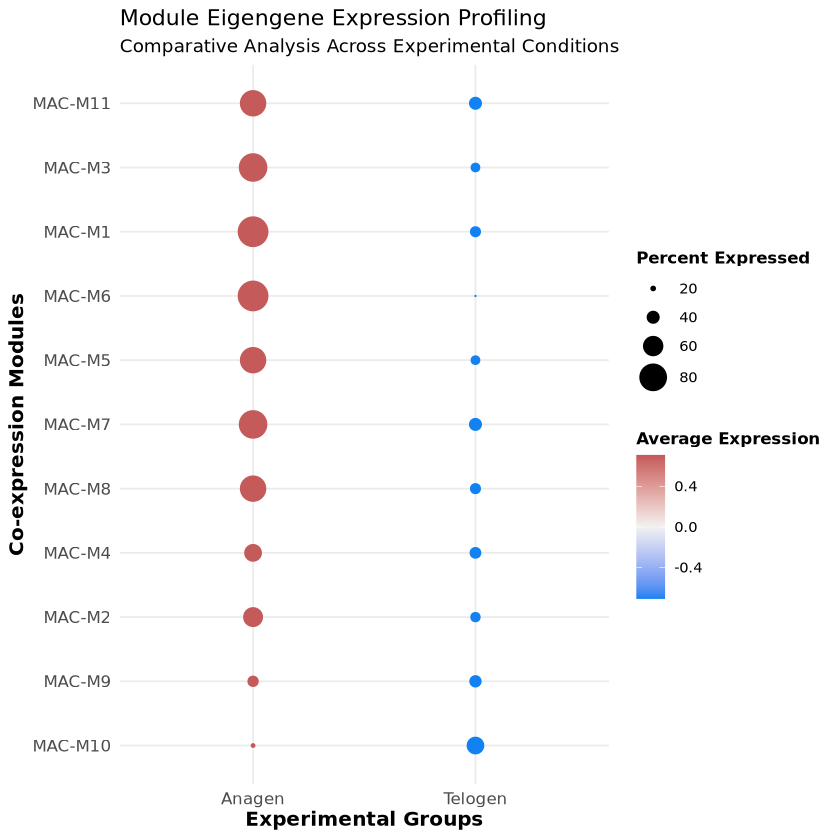

In [19]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE VIII: Module Expression Profiling & Comparative Analysis
# ═══════════════════════════════════════════════════════════════════════════════

# Extract harmonized module eigengenes for analysis
final_MEs <- hdWGCNA::GetMEs(seurat_obj, harmonized = TRUE)
analysis_modules <- colnames(final_MEs)[colnames(final_MEs) != 'grey']

# Integrate module eigengenes into Seurat metadata
seurat_obj@meta.data <- cbind(seurat_obj@meta.data, final_MEs)

# Generate sophisticated module expression dot plot
advanced_dotplot <- Seurat::DotPlot(
  seurat_obj, 
  features = analysis_modules, 
  group.by = connectivity_config$analysis_group,
  dot.scale = 8,
  col.min = -2,
  col.max = 2
) +
  coord_flip() +
  Seurat::RotatedAxis() +
  scale_color_gradient2(
    high = '#c45a5a', 
    mid = 'grey95', 
    low = '#1282f2',
    name = "Module\nEigengene\nExpression"
  ) +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 10, face = "bold")
  ) +
  labs(
    title = "Module Eigengene Expression Profiling",
    subtitle = "Comparative Analysis Across Experimental Conditions",
    x = "Co-expression Modules",
    y = "Experimental Groups"
  )

print(advanced_dotplot)

In [20]:
# ═══════════════════════════════════════════════════════════════════════════════
# PHASE IX: Advanced Network Topology Visualization
# ═══════════════════════════════════════════════════════════════════════════════

# Configure sophisticated network visualization parameters
network_viz_config <- list(
  inner_circle_nodes = 7,                # Core hub genes in inner circle
  outer_circle_nodes = 13,               # Secondary hubs in outer circle
  module_selection = "all",              # Visualize all detected modules
  output_directory = "Advanced_ModuleNetworks",
  plot_dimensions = c(8, 8),             # High-resolution plot size
  edge_transparency = 0.25,              # Edge visibility optimization
  edge_thickness = 0.75,                 # Connection strength representation
  node_size = 20,                        # Gene node prominence
  label_size = 1.6,                      # Gene label readability
  center_labeling = FALSE                # Distribute labels optimally
)

# Generate publication-quality module network visualizations
network_plots <- hdWGCNA::ModuleNetworkPlot(
  seurat_obj = seurat_obj,
  n_inner = network_viz_config$inner_circle_nodes,
  n_outer = network_viz_config$outer_circle_nodes,
  mods = network_viz_config$module_selection,
  outdir = network_viz_config$output_directory,
  plot_size = network_viz_config$plot_dimensions,
  label_center = network_viz_config$center_labeling,
  edge.width = network_viz_config$edge_thickness,
  edge.alpha = network_viz_config$edge_transparency,
  vertex.label.cex = network_viz_config$label_size,
  vertex.size = network_viz_config$node_size
)

# ═══════════════════════════════════════════════════════════════════════════════
# ANALYSIS COMPLETION SUMMARY
# ═══════════════════════════════════════════════════════════════════════════════

cat("\n🎉 Advanced hdWGCNA Analysis Pipeline Completed Successfully\n")
cat("📁 Output files generated in multiple directories\n")
cat("🔬 Network topology and module detection finalized\n")
cat("📊 Publication-ready visualizations created\n\n")

# Memory optimization and cleanup
gc(verbose = FALSE)

Writing output files to Advanced_ModuleNetworks[1] "MAC-M1"
[1] "MAC-M2"
[1] "MAC-M3"
[1] "MAC-M4"
[1] "MAC-M5"
[1] "MAC-M6"
[1] "MAC-M7"
[1] "MAC-M8"
[1] "MAC-M9"
[1] "MAC-M10"
[1] "MAC-M11"

🎉 Advanced hdWGCNA Analysis Pipeline Completed Successfully
📁 Output files generated in multiple directories
🔬 Network topology and module detection finalized
📊 Publication-ready visualizations created



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9620325,513.8,14285235,763.0,14285235,763.0
Vcells,18157931,138.6,37389395,285.3,37389305,285.3
